In [2]:
from QHD import *

# First, we must define all the parameters as stated in section 1 as symbols:

D, alpha, q_0, q = symbols("D, alpha, q_0, q")

# When computing symbolically, we do not need to use the numpy exponential function.

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)

diff1, diff2

x = Symbol("x")

diff11 = diff1.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff11

diff22 = diff2.replace(exp(-alpha*(q-q_0)), x).replace(exp(-2*alpha*(q-q_0)), x**2)

diff22

In [3]:
# Again, we must first define all variables as symbols. #

q, p, p2, x, x2, xp, dt, mass, D, alpha = symbols("q, p, p2, x, x2, xp, dt, mass, D, alpha")

########## EOM Calculations ##########

# If you want to see the output of any of the below, uncomment the desired print line. #

q1 = str(QHD_int(q, 1, dt))

#print("q = " + str(q1))

x1 = str(QHD_int(x, 1, 0.5*dt))
#x = exp(-alpha*q)

#x1 = str(QHD_int(x, 1, dt)).replace("exp(-alpha*q)","x").replace("dt","0.5*dt")

#x21 = str(QHD_int(x, 2, dt)).replace("exp(-2*alpha*q)", "x2").replace("dt","0.5*dt")
print("x = " + str(x1))

x21 = str(QHD_int(x, 2, 0.5*dt))

print("x2 = " + str(x21))

xp1 = str(QHD_int(xp, 1, 0.5*dt))

#print("xp = " + str(xp1))

p1 = str(expand(sympify(str(QHD_int(p, 1, 0.5*dt)).replace("Derivative(v(q), q)", str(diff11))))).replace("x**2", "x2")

print("p = " + str(p1))

p21 = str(expand(sympify(str(QHD_int(p, 2, 0.5*dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11))))).replace("p**2", "p2").replace("p*x", "xp").replace("xp**2", "p*x2")

#p21 = str(expand(-2*((diff11*p+p*diff11)/2)*0.5*dt+p**2))#.replace("x**2", "x2")

print("p2 = " + str(p21))

p/mass
x = -0.5*alpha*dt*xp/mass + x
x2 = -1.0*alpha*dt*x*(-p*x + xp)/mass + (-1.0*alpha*dt*x*(-p*x + xp)/mass + x2)*exp(-1.0*alpha*dt*p/mass)
-1*1*Derivative(v(q), q)
p = 1.0*D*alpha*dt*x2 - 1.0*D*alpha*dt*x + p
-4*((p*Derivative(v(q), q)+Derivative(v(q), q)*p)/2)
p2 = 4.0*D*alpha*dt*p*x2 - 4.0*D*alpha*dt*xp + p2


-4*((p*Derivative(v(q), q)+Derivative(v(q), q)*p)/2)


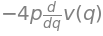

In [4]:
(time_deriv(p, 2))

In [4]:
import math

hbar = 0.6582  # eV * fs


def integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q = q + p*dt/mass
    return q

def integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q2 = q2 + 2.0*pq*dt/mass
    return q2

def integrate_p(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p = p + 2.0*alp*D*(x2-x)*dt
    return p

def integrate_p2(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p2 = p2 + dt*4.0*alp*D*( (x2 - 2.0*x*x)*p + (2.0*x-1.0)*xp ) 
    return p2

def integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    pq = pq + dt*(p2/mass) + dt*2.0*alp*D*( (x2 - 2.0*x*x)*q + (2.0*x-1.0)*xq ) 
    return pq

def integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x = x - alp*xp*dt/mass
    return x

def integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x2 = N(x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt)
    x2 = N(exp(-2.0*alp*p*dt/mass)*x2)
    x2 = N(x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt)
    return x2

def integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = N(xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) ))
    xp = N(exp(-2.0*alp*p*dt/mass)*xp)
    xp = N(xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) ))
    return xp

def integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xq = N(xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) ))
    xq = N(exp(-alp*p*dt/mass)*xq)
    xq = N(xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) ))
    return xq


def gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
#    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xp = eval(xp1)

#    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    x2 = eval(x21)
    
    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    x = eval(x1)
    
#    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = eval(p21)
    
#    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p = eval(p1)

#    q  = integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)
    q = eval(q1)

#    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p = eval(p1)
#    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = eval(p21)
#    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x = eval(x1)
#    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = eval(x21)
#    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
#    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xp = eval(xp1)

    Ekin_cl = 0.5*p*p/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(math.exp(-2.0*alp*q) - 2.0*math.exp(-alp*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

    return [q,p,pq,q2,p2,x,x2,xp,xq, Etot, Etot_cl]

In [5]:
#def solve(mass,q0,p0,s0,ps0,T,dt,filename):
convert = (1.0/17.586)

mass,q0,p0,s0,ps0,T,dt = 2980.0*convert, 0.15, 0.0, 0.05, 0.0, 5000, 0.01
q_list = []
t_list = []

alp = 2.567
D = 4.419 # eV
#    D = 1.0

m = mass
alp = 2.567
alpha = 2.567
hbar = 0.6582

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = exp(-2.0*alp*q0)*exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,0.0,mass,alp,D)
Etot, Etot_cl = Etot0,Etot_cl0

i=0
while i<1:        
    s = (q2 - q*q)
    if s>0.0:
        s = math.sqrt(s)
    else: 
        s = 0.0
    if s>0.0:
        ps = (pq - p*q)/s
    else: 
        ps = 0.0
    q_list.append(q)
    t_list.append(t)
    i = i+1


while t<=T:
    
#    q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)

    xp = eval(xp1)
    x2 = eval(x21)
    x = eval(x1)
    
    p2 = eval(p21)   
    p = eval(p1)

    q = eval(q1)

    p = eval(p1)
    p2 = eval(p21)

    x = eval(x1)
    x2 = eval(x21)
    xp = eval(xp1)

#    Ekin_cl = 0.5*p*p/mass
#    Ekin    = 0.5*p2/mass
#    Epot_cl = D*(math.exp(-2.0*alp*q) - 2.0*math.exp(-alp*q))
#    Epot    = D*(x2 - 2.0*x)
#    Etot_cl = Ekin_cl + Epot_cl
#    Etot    = Ekin    + Epot

    t = t + dt

    i=0
    while i<1:
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0

        q_list.append(q)
        t_list.append(t)
            
        i = i+1

OverflowError: too many digits in integer

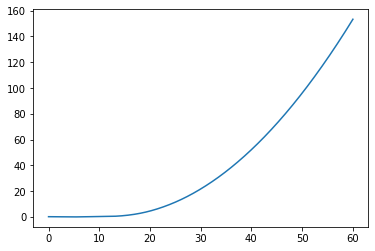

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = t_list

#for i in range(0, len(t_list)):
#    t_list[i] = t_list[i]*0.02418884254

y = q_list

plt.plot(x, y)

In [11]:
time_deriv(p, 2)

SympifyError: Sympify of expression 'could not parse '-5.43580564291/(2*mass)*f(q)21/(2*mass)*f(q)3*-hbar*i*Derivative(-hbar*i*Derivative(1/(2*mass)*f(q), q), q) - 5.43580564291213*v(q)*f(q) - hbar*i*Derivative(-hbar*i*Derivative(1/(2*mass)*5.43580564291213*f(q), q), q) + v(q)*5.43580564291213*f(q)'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

In [273]:
import math

hbar = 0.6582  # eV * fs


def integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q = q + p*dt/mass
    return q

def integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    q2 = q2 + 2.0*pq*dt/mass
    return q2

def integrate_p(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p = p + 2.0*alp*D*(x2-x)*dt
    return p

def integrate_p2(q,p,qp,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    p2 = p2 + dt*4.0*alp*D*( (x2 - 2.0*x*x)*p + (2.0*x-1.0)*xp ) 
    return p2

def integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    pq = pq + dt*(p2/mass) + dt*2.0*alp*D*( (x2 - 2.0*x*x)*q + (2.0*x-1.0)*xq ) 
    return pq

def integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x = x - alp*xp*dt/mass
    return x

def integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    x2 = math.exp(-2.0*alp*p*dt/mass)*x2
    x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
    return x2

def integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    xp = math.exp(-2.0*alp*p*dt/mass)*xp
    xp = xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) )
    return xp

def integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xq = xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) )
    xq = math.exp(-alp*p*dt/mass)*xq
    xq = xq + 0.5*(dt/mass)*( xp*(1.0 - alp*q) - alp*x*(pq - 2.0*q*p) )
    return xq


def gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D):
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    q  = integrate_q(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)

    p  = integrate_p(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    q2 = integrate_q2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    p2 = integrate_p2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    pq = integrate_pq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x  = integrate_x(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    x2 = integrate_x2(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xq = integrate_xq(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)
    xp = integrate_xp(q,p,pq,q2,p2,x,x2,xp,xq,0.5*dt,mass,alp,D)

    Ekin_cl = 0.5*p*p/mass
    Ekin    = 0.5*p2/mass
    Epot_cl = D*(math.exp(-2.0*alp*q) - 2.0*math.exp(-alp*q))
    Epot    = D*(x2 - 2.0*x)
    Etot_cl = Ekin_cl + Epot_cl
    Etot    = Ekin    + Epot

    return [q,p,pq,q2,p2,x,x2,xp,xq, Etot, Etot_cl]



def solve(mass,q0,p0,s0,ps0,T,dt,filename):

    alp = 2.567
    D = 4.419 # eV
#    D = 1.0

    f1=open(filename,"w")
    t = 0.0    
    Etot = 0.0
    Etot0 = 0.0
    Etot_cl = 0.0
    Etot_cl0 = 0.0
    q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    q, p = q0, p0
    q2 = q*q + s0*s0
    pq = ps0*s0 + q*p
    p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
    x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
    x2 = math.exp(-2.0*alp*q0)*math.exp(2.0*alp*alp*s0*s0)
    xq = x*(q-alp*s0*s0)
    xp = x*(p - s0*ps0*alp)

    q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,0.0,mass,alp,D)
    Etot, Etot_cl = Etot0,Etot_cl0

    line = str(t)+"  "+str(Etot/Etot0)+"  "
    i=0
    while i<1:        
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0
        line = line +str(q)+"  "+str(p)+"  "+str(s)+"  "+str(ps)+"  "
        i = i+1
    line = line +str(Etot)+"  "+str(Etot_cl)+"\n"
    f1.write(line)
    

    while t<=T:
        q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)
        t = t + dt
        line = str(t)+"  "+str(Etot/Etot0)+"  "
        i=0
        while i<1:
            s = (q2 - q*q)
            if s>0.0:
                s = math.sqrt(s)
            else: 
                s = 0.0
            if s>0.0:
                ps = (pq - p*q)/s
            else: 
                ps = 0.0

            line = line +str(q)+"  "+str(p)+"  "+str(s)+"  "+str(ps)+"  "
            i = i+1
        line = line +str(Etot)+"  "+str(Etot_cl)+"\n"
        f1.write(line)

    f1.close()


#convert = (1.0/17.102)
convert = (1.0/17.586)  # More accurate value !
solve(2980.0*convert, 0.15, 0.0, 0.05, 0.0, 5000, 0.01,"o4")

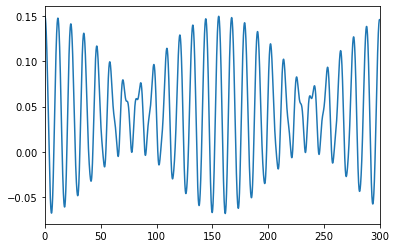

In [57]:
x = np.loadtxt("o4")[:, 0]
y = np.loadtxt("o4")[:, 2]

plt.plot(x, y)
plt.xlim(0, 300)